## Building a Period Prediction Linear Regression Model

This notebook demonstrates the process of building a linear regression model to predict menstrual cycle periods.

**Dataset:** 
The dataset used in this analysis was obtained from Kaggle
#### Purpose
With this, girls can predict their next period, stand out without what if? and now the changes that goes on in their bodies 


In [1]:
#importing EDA libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#import Ml libraries 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:
#importing dataset

data = pd.read_csv("menstrual_tracking_data.csv")

## EXPLORING THE DATASET

In [3]:
#displaying the first 5 rows
data.head(5)

,user_id,login_date,cycle_length,period_duration,symptoms,nextperiod_date
0,1,8/18/2023,27,4,"bloating, fatigue, acne",9/14/2023
1,2,7/8/2023,24,3,"acne, bloating",8/1/2023
2,3,3/1/2023,33,7,"cramps, bloating",4/3/2023
3,4,9/5/2023,35,6,"bloating, cramps, fatigue",10/10/2023
4,5,6/2/2023,31,4,fatigue,7/3/2023


In [4]:
#displaying the column names
data.columns

Index(['user_id', 'login_date', 'cycle_length', 'period_duration', 'symptoms',
       'nextperiod_date'],
      dtype='object')

In [5]:
#information about the dataset
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          500 non-null    int64 
 1   login_date       500 non-null    object
 2   cycle_length     500 non-null    int64 
 3   period_duration  500 non-null    int64 
 4   symptoms         500 non-null    object
 5   nextperiod_date  500 non-null    object
dtypes: int64(3), object(3)
memory usage: 23.6+ KB


(500, 6)

In [6]:
#describing numerical values 
data.describe()

,user_id,cycle_length,period_duration
count,500.000000,500.000000,500.000000
mean,250.500000,27.846000,5.032000
std,144.481833,4.367199,1.461248
min,1.000000,21.000000,3.000000
25%,125.750000,24.000000,4.000000
50%,250.500000,28.000000,5.000000
75%,375.250000,32.000000,6.000000
max,500.000000,35.000000,7.000000


In [7]:
#describing non-numerical values 
data.describe(include='O')

,login_date,symptoms,nextperiod_date
count,500,500,500
unique,359,128,358
top,9/8/2023,acne,9/29/2023
freq,5,32,4


In [8]:
#checking for null values 
data.isnull()
data.isnull().sum()
##

user_id            0
login_date         0
cycle_length       0
period_duration    0
symptoms           0
nextperiod_date    0
dtype: int64

In [9]:
#checking the next period date
data[["cycle_length"]].max()

cycle_length    35
dtype: int64

In [10]:
#checking the data types
data.dtypes

user_id             int64
login_date         object
cycle_length        int64
period_duration     int64
symptoms           object
nextperiod_date    object
dtype: object

In [11]:
data['login_date']  = pd.to_datetime(data['login_date'])
data['nextperiod_date'] = pd.to_datetime(data['nextperiod_date'])

data['login_date'].dtypes

dtype('<M8[ns]')

In [12]:
#checking for unique values
data['cycle_length'].nunique()

15

In [13]:
#checking for unique values
data['login_date'].nunique()

359

In [14]:
#checking for unique values
data['nextperiod_date'].nunique()

358

In [15]:
data.value_counts

<bound method DataFrame.value_counts of      user_id login_date  cycle_length  period_duration  \
0          1 2023-08-18            27                4   
1          2 2023-07-08            24                3   
2          3 2023-03-01            33                7   
3          4 2023-09-05            35                6   
4          5 2023-06-02            31                4   
..       ...        ...           ...              ...   
495      496 2022-09-25            33                4   
496      497 2023-10-17            30                6   
497      498 2023-07-25            27                4   
498      499 2023-05-04            30                3   
499      500 2023-06-22            23                6   

                          symptoms nextperiod_date  
0          bloating, fatigue, acne      2023-09-14  
1                   acne, bloating      2023-08-01  
2                 cramps, bloating      2023-04-03  
3        bloating, cramps, fatigue      2023-10-10 

In [16]:
data = data.drop(columns='symptoms')

In [17]:
corrh = data.corr()
print(data)

     user_id login_date  cycle_length  period_duration nextperiod_date
0          1 2023-08-18            27                4      2023-09-14
1          2 2023-07-08            24                3      2023-08-01
2          3 2023-03-01            33                7      2023-04-03
3          4 2023-09-05            35                6      2023-10-10
4          5 2023-06-02            31                4      2023-07-03
..       ...        ...           ...              ...             ...
495      496 2022-09-25            33                4      2022-10-28
496      497 2023-10-17            30                6      2023-11-16
497      498 2023-07-25            27                4      2023-08-21
498      499 2023-05-04            30                3      2023-06-03
499      500 2023-06-22            23                6      2023-07-15

[500 rows x 5 columns]


## Visualisations 

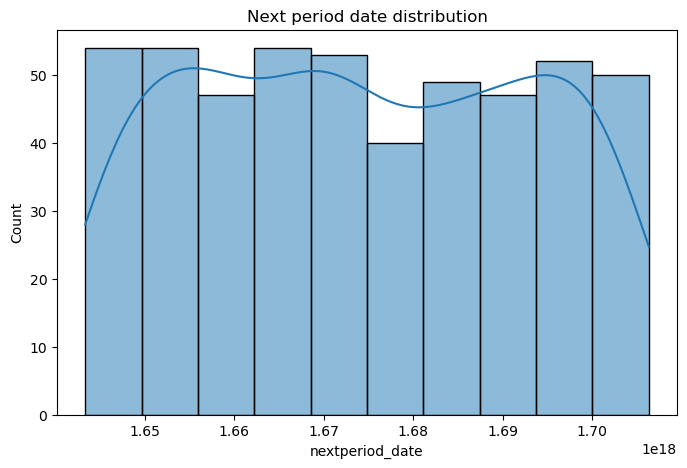

In [18]:

# Plot target distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['nextperiod_date'].astype("int64"), kde=True)
plt.title('Next period date distribution')
plt.show()

Text(0.5, 1.0, 'correlation of the data')

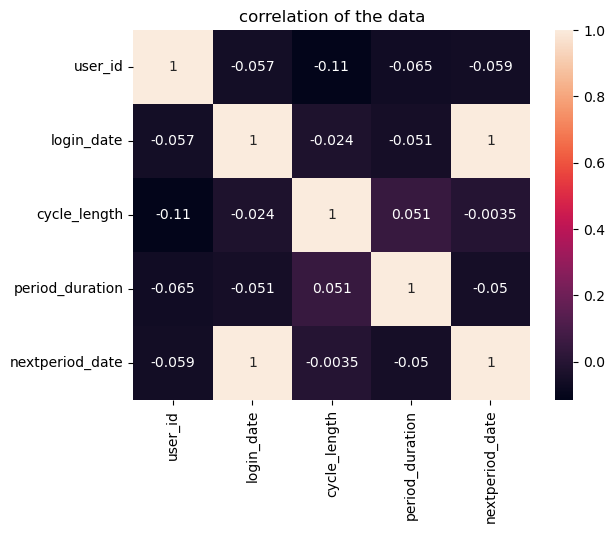

In [19]:
sns.heatmap(corrh, annot =True)
plt.title('correlation of the data' )

In [20]:
#checking for duplicates
data.duplicated().sum()

0

<Axes: xlabel='login_date', ylabel='nextperiod_date'>

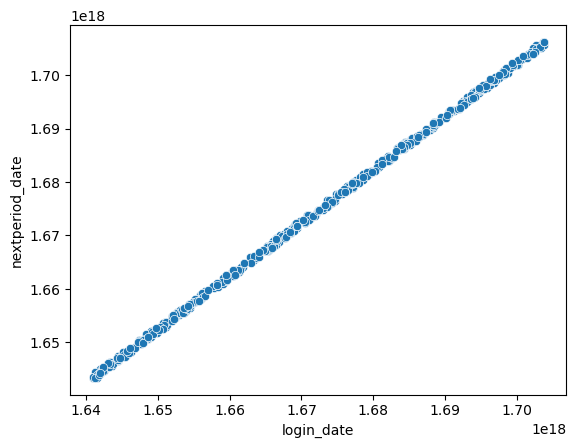

In [21]:
#verifying why the correlation equals 1
x = data["login_date"].astype("int64")
y = data["nextperiod_date"].astype("int64")
sns.scatterplot( x = x, y =y)

<Axes: xlabel='cycle_length', ylabel='nextperiod_date'>

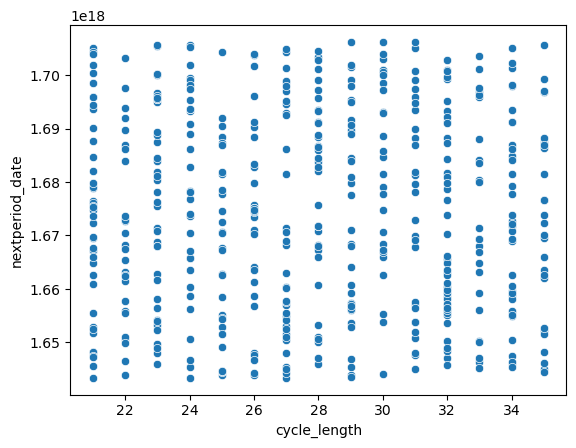

In [22]:
#finding the relationship between cycle_length and nextperiod_date

x = data["cycle_length"].astype("int64")
y = data["nextperiod_date"].astype("int64")
sns.scatterplot( x = x, y =y)

In [23]:
#adding timestamp columns 
data["login_timestamp"] = pd.to_datetime(data["login_date"]).astype(np.int64) // 10**9
data['login_timestamp']

data['nextperiod_timestamp'] = data[["nextperiod_date"]].astype(np.int64) //10**9
data['login_timestamp']

#pd.to_datetime(data['login_timestamp'])


0      1692316800
1      1688774400
2      1677628800
3      1693872000
4      1685664000
          ...    
495    1664064000
496    1697500800
497    1690243200
498    1683158400
499    1687392000
Name: login_timestamp, Length: 500, dtype: int64

In [24]:
data

,user_id,login_date,cycle_length,period_duration,nextperiod_date,login_timestamp,nextperiod_timestamp
0,1,2023-08-18,27,4,2023-09-14,1692316800,1694649600
1,2,2023-07-08,24,3,2023-08-01,1688774400,1690848000
2,3,2023-03-01,33,7,2023-04-03,1677628800,1680480000
3,4,2023-09-05,35,6,2023-10-10,1693872000,1696896000
4,5,2023-06-02,31,4,2023-07-03,1685664000,1688342400
...,...,...,...,...,...,...,...
495,496,2022-09-25,33,4,2022-10-28,1664064000,1666915200
496,497,2023-10-17,30,6,2023-11-16,1697500800,1700092800
497,498,2023-07-25,27,4,2023-08-21,1690243200,1692576000
498,499,2023-05-04,30,3,2023-06-03,1683158400,1685750400


## X_TRAIN AND Y_TRAIN


In [25]:
#finding the linear regression model
X = data[['login_timestamp', 'cycle_length', 'period_duration']]
Y = data['nextperiod_timestamp'].values.reshape(-1, 1)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [26]:
Y.shape

(500, 1)

In [27]:
#the data was not splitng equally so i had to do perform this step
print(X_train.shape)
print(Y_train.shape)


(400, 3)
(400, 1)


## Gradient Descent 

In [28]:
#standardising the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)


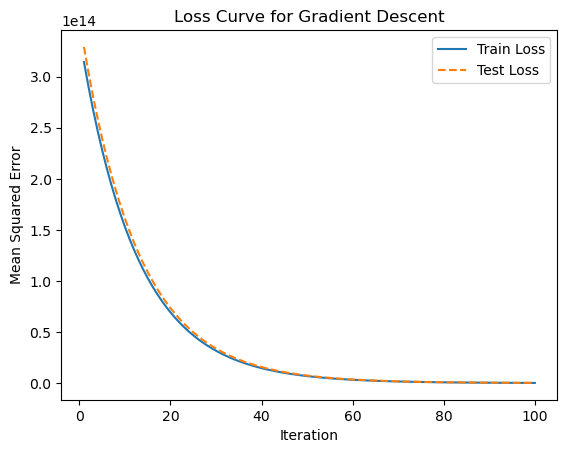

In [29]:


from sklearn.linear_model import SGDRegressor
# Standardize the target
y_scaler = StandardScaler()
Y_train_Scaled = y_scaler.fit_transform(Y_train.reshape(-1, 1)).flatten()
Y_test_Scaled = y_scaler.transform(Y_test.reshape(-1, 1)).flatten()

# Initialize SGDRegressor with a smaller learning rate
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-6, eta0=0.0001, learning_rate='constant', random_state=42, penalty='l2', alpha=0.01)
train_losses = []
test_losses = []

# Train and calculate losses
for _ in range(100):
    sgd_reg.partial_fit(X_train_Scaled, Y_train_Scaled)
    y_train_pred = sgd_reg.predict(X_train_Scaled)
    y_test_pred = sgd_reg.predict(X_test_Scaled)

    train_losses.append(mean_squared_error(Y_train, y_scaler.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()))
    test_losses.append(mean_squared_error(Y_test, y_scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()))

# Plot the loss curve
plt.plot(range(1, 101), train_losses, label='Train Loss')
plt.plot(range(1, 101), test_losses, label='Test Loss', linestyle='dashed')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curve for Gradient Descent')
plt.legend()
plt.show()

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeRegressor

DecisionTree = DecisionTreeRegressor()
DecisionTree.fit(X_train, Y_train)

y_pred_dt = DecisionTree.predict(X_test) 


mse_dt  = mean_squared_error(Y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(Y_test, y_pred_dt)
print(rmse_dt,'\n',r2_dt)

508293.48372765904 
 0.9992744296786144


In [31]:
pd.to_datetime(y_pred_dt)

DatetimeIndex(['1970-01-01 00:00:01.693785600',
               '1970-01-01 00:00:01.657670400',
               '1970-01-01 00:00:01.662854400',
               '1970-01-01 00:00:01.694476800',
                  '1970-01-01 00:00:01.657584',
               '1970-01-01 00:00:01.645315200',
               '1970-01-01 00:00:01.660348800',
               '1970-01-01 00:00:01.656115200',
                  '1970-01-01 00:00:01.701216',
               '1970-01-01 00:00:01.656201600',
               '1970-01-01 00:00:01.670716800',
               '1970-01-01 00:00:01.696723200',
               '1970-01-01 00:00:01.657497600',
                  '1970-01-01 00:00:01.695600',
               '1970-01-01 00:00:01.688428800',
               '1970-01-01 00:00:01.650326400',
               '1970-01-01 00:00:01.665619200',
               '1970-01-01 00:00:01.690761600',
               '1970-01-01 00:00:01.647993600',
                  '1970-01-01 00:00:01.665360',
                  '1970-01-01 00:00:01.7

## Random Forest



In [32]:
#implementing the random forest model
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train, Y_train)

y_pred_rf = RandomForest.predict(X_test)

#calculating the r2score and mse 
mse_rf  = mean_squared_error(Y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(Y_test, y_pred_rf)
print(rmse_rf,'\n',r2_rf)
 


c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


393738.5930434557 
 0.9995646220842034


## Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
#linear regression model
Linear_Regression = LinearRegression()

Linear_Regression.fit(X_train, Y_train.ravel())
y_pred_lr = Linear_Regression.predict(X_test)

#calculating the r2score and mse 
mse_lr  = mean_squared_error(Y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(Y_test, y_pred_lr)
print(rmse_lr,'\n',r2_lr)

0.0 
 1.0


In [34]:
y_pred_lr = pd.to_datetime(y_pred_lr).to_numpy().flatten()
y_pred_lr

array(['1970-01-01T00:00:01.694822400', '1970-01-01T00:00:01.658534400',
       '1970-01-01T00:00:01.663459200', '1970-01-01T00:00:01.695081600',
       '1970-01-01T00:00:01.658102400', '1970-01-01T00:00:01.645833600',
       '1970-01-01T00:00:01.660694400', '1970-01-01T00:00:01.656028800',
       '1970-01-01T00:00:01.701561600', '1970-01-01T00:00:01.656720000',
       '1970-01-01T00:00:01.670716800', '1970-01-01T00:00:01.697068800',
       '1970-01-01T00:00:01.657756800', '1970-01-01T00:00:01.695340800',
       '1970-01-01T00:00:01.688774400', '1970-01-01T00:00:01.650240000',
       '1970-01-01T00:00:01.666915200', '1970-01-01T00:00:01.690070400',
       '1970-01-01T00:00:01.647561600', '1970-01-01T00:00:01.665878400',
       '1970-01-01T00:00:01.704067200', '1970-01-01T00:00:01.660694400',
       '1970-01-01T00:00:01.684022400', '1970-01-01T00:00:01.647302400',
       '1970-01-01T00:00:01.698710400', '1970-01-01T00:00:01.646611200',
       '1970-01-01T00:00:01.692576000', '1970-01-01

## Best Model 

In [35]:
#Ranking the three models
model_rank = {
'linear regression' : rmse_lr,
'Random Forest' : rmse_rf,
'Decision Trees' : rmse_dt
}
model_rank=sorted(model_rank.items(), key=lambda x: x[1])
print (model_rank)

#best model is linear regression

[('linear regression', 0.0), ('Random Forest', 393738.5930434557), ('Decision Trees', 508293.48372765904)]


In [36]:
# Ensure y_pred_lr is a pandas Series
y_pred_lr = pd.Series(y_pred_lr)

# Convert to datetime while handling errors
y_pred_lr = pd.to_datetime(y_pred_lr, errors='coerce')

# Extract only the date (YYYY-MM-DD) not the milliseconds
y_pred_lr = y_pred_lr.dt.date

print(y_pred_lr) # Show first 5 predictions


0     1970-01-01
1     1970-01-01
2     1970-01-01
3     1970-01-01
4     1970-01-01
         ...    
95    1970-01-01
96    1970-01-01
97    1970-01-01
98    1970-01-01
99    1970-01-01
Length: 100, dtype: object


In [37]:
#saving the best model (linear regression)
import pickle
from joblib import load
with open('linearmodel.pkl', 'wb') as file:
    pickle.dump(Linear_Regression, file)

linear_model = load("linearmodel.pkl")
prediction= linear_model.predict(X_test)
prediction = pd.Series(prediction)
prediction = pd.to_datetime(prediction, errors='coerce')
prediction = prediction.dt.date
print(prediction)   



0     1970-01-01
1     1970-01-01
2     1970-01-01
3     1970-01-01
4     1970-01-01
         ...    
95    1970-01-01
96    1970-01-01
97    1970-01-01
98    1970-01-01
99    1970-01-01
Length: 100, dtype: object


In [38]:
data['period_duration'].max()

7

In [ ]:

from datetime import datetime
output = print(Linear_Regression.predict([[1700000000, 28, 5]]))

output = int64(output)

#output converted to time 
output1=  datetime.utcfromtimestamp(output).strftime('%Y-%m-%d')
print(output1)


[1.7024192e+09]


c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Temp\ipykernel_26892\383279195.py:7: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  output1=  datetime.utcfromtimestamp(output).strftime('%Y-%m-%d')


TypeError: 'str' object cannot be interpreted as an integer